In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import load_wine,load_iris,make_classification,make_regression,make_blobs,load_digits
from sklearn.dummy import DummyRegressor,DummyClassifier
from sklearn.model_selection import KFold,cross_val_score,train_test_split,learning_curve,validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix,silhouette_score,make_scorer,r2_score,classification_report
from sklearn.cluster import KMeans 

11.1 : Cross-Validating Models

In [2]:
digits = load_digits()
features = digits.data
target = digits.target
standardizer = StandardScaler()
logit = LogisticRegression()

pipeline = make_pipeline(standardizer,logit)

kf = KFold(n_splits=5,shuffle=True,random_state=0)

cv_results = cross_val_score(pipeline,# Pipeline
                             features,# Feature Matrix
                             target,# Target Vector
                             cv=kf,# Performance Metric
                             scoring="accuracy",# Loss Function
                             n_jobs=-1)# Use all CPU cores
cv_results.mean()

np.float64(0.9677329000309502)

In [3]:
pipeline

,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


Discussion

In [4]:
cv_results

array([0.96111111, 0.95833333, 0.97771588, 0.96935933, 0.97214485])

In [5]:
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.1,random_state=1)
standardizer.fit(features_train)
features_train_std= standardizer.transform(features_train)
features_test_std= standardizer.transform(features_test)
pipeline = make_pipeline(standardizer,logit)
cv_results = cross_val_score(pipeline,
                             features,
                             target,
                             cv=kf,
                             scoring="accuracy",
                             n_jobs=-1
                             )

In [6]:
cv_results

array([0.96111111, 0.95833333, 0.97771588, 0.96935933, 0.97214485])

11.2 : Creating a BAseline Regression Model

In [7]:
wine = load_wine()
features,target = wine.data,wine.target
features_train, features_test , target_train,target_test = train_test_split(features,target,random_state=0)

dummy = DummyRegressor(strategy='mean')
dummy.fit(features_train,target_train)
dummy.score(features_test,target_test)

-0.0480213580840978

In [8]:
ols = LinearRegression()
ols.fit(features_train,target_train)
ols.score(features_test,target_test)

0.8043532631769538

Duscussion

In [9]:
clf = DummyRegressor(strategy='constant',constant=1)
clf.fit(features_train,target_train)
clf.score(features_test,target_test)

-0.06299212598425186

11.3 : Creating a Baseline Classification odel

In [10]:
iris = load_iris()
features,target = iris.data,iris.target
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0)
dummy = DummyClassifier(strategy="uniform",random_state=1)
dummy.fit(features_train,target_train)
dummy.score(features_test,target_test)

0.42105263157894735

In [11]:
classifier = RandomForestClassifier()
classifier.fit(features_train,target_train)
classifier.score(features_test,target_test)

0.9736842105263158

11.4 : Evaluating Binary Classifier Predictions

In [12]:
X,y  = make_classification(n_samples=10000,
                           n_features = 3,
                           n_informative = 3,
                           n_redundant = 0,
                           n_classes = 2,
                           random_state=1)

logit = LogisticRegression()
cross_val_score(logit,X,y,scoring="accuracy")

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [13]:
cross_val_score(logit,X,y,scoring="precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [14]:
cross_val_score(logit,X,y,scoring="recall")

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [15]:
cross_val_score(logit,X,y,scoring="f1")

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

Discussion

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.1,
                                                 random_state=1)

y_hat = logit.fit(X_train,y_train).predict(X_test)
accuracy_score(y_test,y_hat)

0.947

11.5 : Evaluating Binary Classifier Thresholds

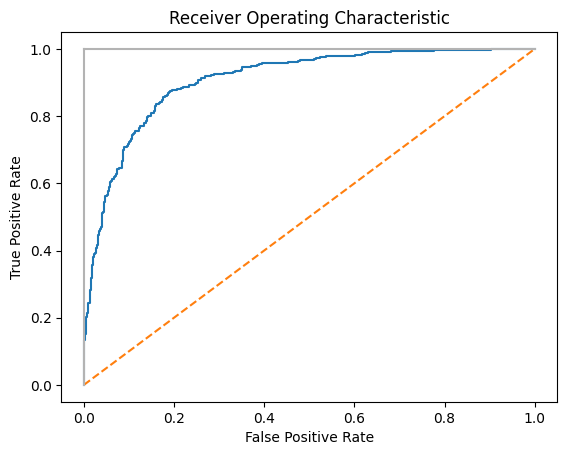

In [17]:
features,target = make_classification(n_samples=10000,
                                      n_features=10,
                                      n_classes=2,
                                      n_informative=3,
                                      random_state=3)

features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.1,random_state=1)
logit.fit(features_train,target_train)
target_probabilities = logit.predict_proba(features_test)[:,1]
false_positive_rate,true_positive_rate,threshold = roc_curve(target_test,
                                                             target_probabilities)

plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate,true_positive_rate)
plt.plot([0,1],ls="--")
plt.plot([0,0],[1,0],c=".7"),plt.plot([1,1],c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Discussion

In [18]:
logit.predict_proba(features_test)[0:1]

array([[0.8689235, 0.1310765]])

In [19]:
logit.classes_

array([0, 1])

In [20]:
print("Threshold:", threshold[124])
print("True Positive Rate:", true_positive_rate[124])
print("False Positive Rate:", false_positive_rate[124])

Threshold: 0.4981509475208573
True Positive Rate: 0.8367346938775511
False Positive Rate: 0.1627450980392157


In [21]:
print("Threshold:", threshold[49])
print("True Positive Rate:", true_positive_rate[49])
print("False Positive Rate:", false_positive_rate[49])

Threshold: 0.8058635463651345
True Positive Rate: 0.5653061224489796
False Positive Rate: 0.052941176470588235


In [22]:
roc_auc_score(target_test,target_probabilities)

0.9073429371748699

11.6 : Evalusting Multiclass Classifier Predictions

In [23]:
features,target = make_classification(n_samples=10000,
                                      n_features=3,
                                      n_informative=3,
                                      n_redundant=0,
                                      n_classes=3,
                                      random_state=1)
logit = LogisticRegression()

cross_val_score(logit,features,target,scoring='accuracy')

array([0.8405, 0.829 , 0.827 , 0.8155, 0.8205])

In [24]:
cross_val_score(logit,features,target,scoring='f1_macro')

array([0.84012014, 0.82895312, 0.82675308, 0.81515121, 0.82042629])

11.7 : Visualizing a Classifier`s Performance

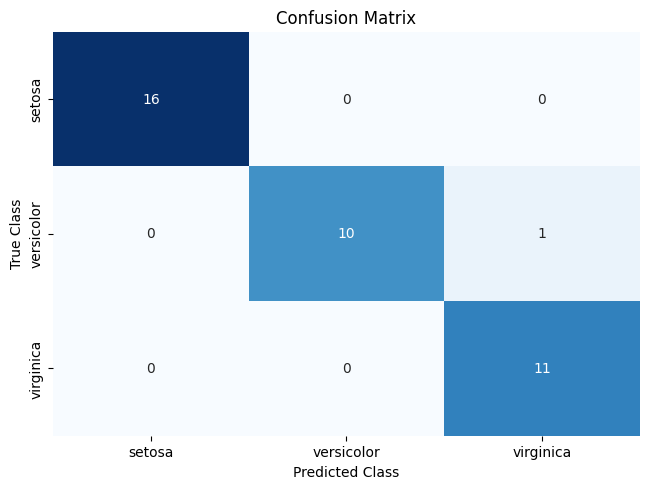

In [25]:
iris = load_iris()
features , target = iris.data,iris.target

class_names = iris.target_names
features_train,features_test,target_train,target_test=train_test_split(features,target,random_state=2)
classifier = LogisticRegression()
target_predicted = classifier.fit(features_train,target_train).predict(features_test)

matrix = confusion_matrix(target_test,target_predicted)
dataframe = pd.DataFrame(matrix,index=class_names,columns=class_names)

sns.heatmap(dataframe,annot=True,cbar=None,cmap="Blues")
plt.title("Confusion Matrix"),plt.tight_layout()
plt.ylabel("True Class"),plt.xlabel("Predicted Class")
plt.show()

11.8 : Evaluating Regression Models

In [26]:
features,target = make_regression(n_samples=100,
                                  n_features=3,
                                  n_informative=3,
                                  n_targets=1,
                                  noise=50,
                                  coef=False,
                                  random_state=1)

ols = LinearRegression()
cross_val_score(ols,features,target,scoring='neg_mean_squared_error')


array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [27]:
cross_val_score(ols,features,target,scoring='r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

11.9 : Evaluating Clustering Models

In [28]:
features,_ =  make_blobs(n_samples=100,
                      n_features=10,
                      centers=2,
                      cluster_std=0.5,
                      shuffle = True,
                      random_state=1)
model = KMeans(n_clusters=2,random_state=1).fit(features)
target_predicted = model.labels_
silhouette_score(features,target_predicted)

0.8934850469838235

11.10 : Creating a Custom Evaluation Metric

In [29]:
features,target = make_regression(n_samples=100,
                                  n_features=3,
                                  random_state=1)

features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.10,random_state=1)

def custom_metric(target_test,target_predicted):
    r2 = r2_score(target_test,target_predicted)
    return r2

score = make_scorer(custom_metric,greater_is_better=True)
classifier = Ridge()

model = classifier.fit(features_train,target_train)
score(model,features_test,target_test)

0.9997906102882058

Discussion

In [30]:
target_predicted = model.predict(features_test)

r2_score(target_test,target_predicted)

0.9997906102882058

11.11 : Visualizing the Effect of Training Set Size

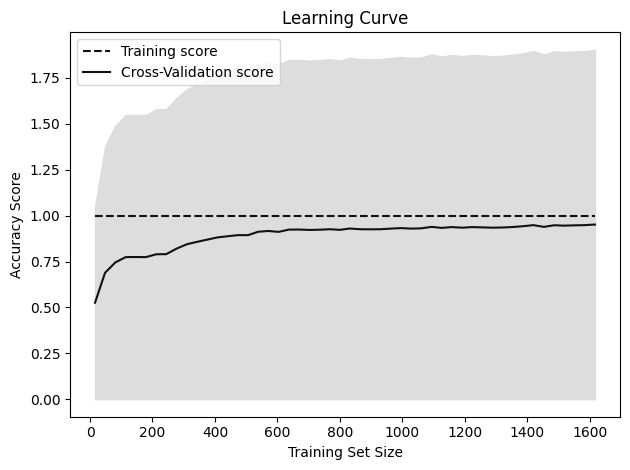

In [31]:
digits = load_digits()
features,target = digits.data,digits.target
train_sizes,train_scores,test_scores = learning_curve(RandomForestClassifier(),
                                                      features,
                                                      target,
                                                      #number of folds
                                                      cv=10,
                                                      # performance metric
                                                      scoring='accuracy',
                                                      # use all computer cores
                                                      n_jobs=-1,
                                                      # sizs of 50
                                                      # training set

                                                      train_sizes=np.linspace(0.01,
                                                                              1.0,
                                                                              50))
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)

test_mean = np.mean(test_scores,axis=1)
test_std = np.mean(test_scores,axis=1)

plt.plot(train_sizes,train_mean,'--',color="#111111",label="Training score")
plt.plot(train_sizes,test_mean,color="#111111",label="Cross-Validation score")

plt.fill_between(train_sizes,train_mean - train_std,train_mean+train_std,color="#DDDDDD")
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"),plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

11.12 : Creating a Text Report of Evaluation Metrics

In [32]:
iris = load_iris()
features ,target ,class_names= iris.data,iris.target ,iris.target_names

features_train , features_test , target_train,target_test=train_test_split(features,
                                                                           target,
                                                                           random_state=0
)

classifier = LogisticRegression()
model = classifier.fit(features_train,target_train)
target_predicted = model.predict(features_test)

print(classification_report(target_test,
                            target_predicted,
                            target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



11.13 : Visualizing the Effect of Hyperparameter Values

AttributeError: module 'matplotlib.pyplot' has no attribute 'little'

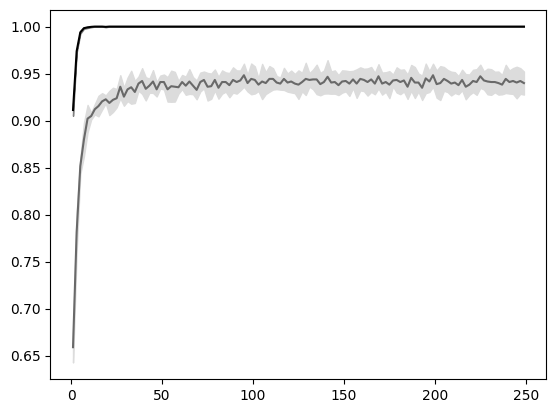

In [33]:
digits = load_digits()
features , target = digits.data,digits.target
param_range = np.arange(1,250,2)
train_scores,test_scores = validation_curve(RandomForestClassifier(),
                                            features,
                                            target,
                                            param_name="n_estimators",
                                            param_range=param_range,
                                            cv=3,
                                            scoring="accuracy",
                                            n_jobs=-1)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)

test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.plot(param_range,train_mean,label="Training score",color="black")
plt.plot(param_range,test_mean,label="Cross-validation score",color="dimgrey")

plt.fill_between(param_range,train_mean-train_std,train_mean+train_std,color="gray")
plt.fill_between(param_range,test_mean-test_std,test_mean+test_std,color="gainsboro")

plt.little("VAlidation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()